## data ai team linear regression education

In [1]:
import numpy as np

In [2]:
car_prices_array=[3,4,5,6,7,8,9]
car_price_np=np.array(car_prices_array,dtype=np.float32)

In [3]:
car_price_np=car_price_np.reshape(-1,1)

In [4]:
car_price_np

array([[3.],
       [4.],
       [5.],
       [6.],
       [7.],
       [8.],
       [9.]], dtype=float32)

In [7]:
import torch
from torch.autograd import Variable

In [8]:
car_price_tensor=Variable(torch.from_numpy(car_price_np))

In [9]:
car_price_tensor

tensor([[3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])

In [10]:
number_of_car_sell_array = [ 7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array,dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))


In [11]:
number_of_car_sell_tensor

tensor([[7.5000],
        [7.0000],
        [6.5000],
        [6.0000],
        [5.5000],
        [5.0000],
        [4.5000]])

Text(0.5, 1.0, 'Car Price$ VS Number of Car Sell')

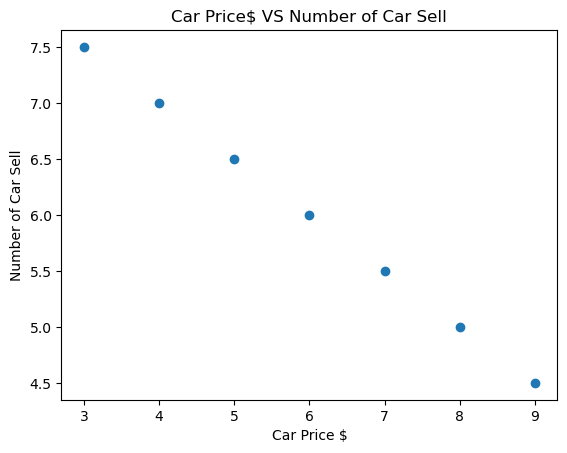

In [12]:
import matplotlib.pyplot as plt
plt.scatter(car_prices_array,number_of_car_sell_array)
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ VS Number of Car Sell")

In [13]:
import torch.nn as nn 
import warnings
warnings.filterwarnings("ignore")

In [17]:
class LinearRegression(nn.Module):
    def __init__(self,input_size,output_size):
        
    
        super(LinearRegression,self).__init__()
        self.linear = nn.Linear(input_dim,output_dim)

    def forward(self,x):
        return self.linear(x)

In [18]:
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim,output_dim)

In [19]:
mse = nn.MSELoss()

In [20]:
mse

MSELoss()

In [21]:
learning_rate = 0.02   
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

In [22]:
loss_list = []
iteration_number = 1001
for iteration in range(iteration_number):
        
    # optimization
    optimizer.zero_grad() 
    
    # Forward to get output
    results = model(car_price_tensor)
    
    # Calculate Loss
    loss = mse(results, number_of_car_sell_tensor)
    
    # backward propagation
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    
    # print loss
    if(iteration % 50 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))

epoch 0, loss 162.9718475341797
epoch 50, loss 6.310705661773682
epoch 100, loss 4.264408588409424
epoch 150, loss 2.8816394805908203
epoch 200, loss 1.9472453594207764
epoch 250, loss 1.3158349990844727
epoch 300, loss 0.8891640901565552
epoch 350, loss 0.6008453965187073
epoch 400, loss 0.40601634979248047
epoch 450, loss 0.27436205744743347
epoch 500, loss 0.18539753556251526
epoch 550, loss 0.1252806931734085
epoch 600, loss 0.08465705811977386
epoch 650, loss 0.05720653757452965
epoch 700, loss 0.03865691274404526
epoch 750, loss 0.02612217329442501
epoch 800, loss 0.017651770263910294
epoch 850, loss 0.011928042396903038
epoch 900, loss 0.00806027464568615
epoch 950, loss 0.005446738097816706
epoch 1000, loss 0.003680566092953086


Text(0, 0.5, 'Loss')

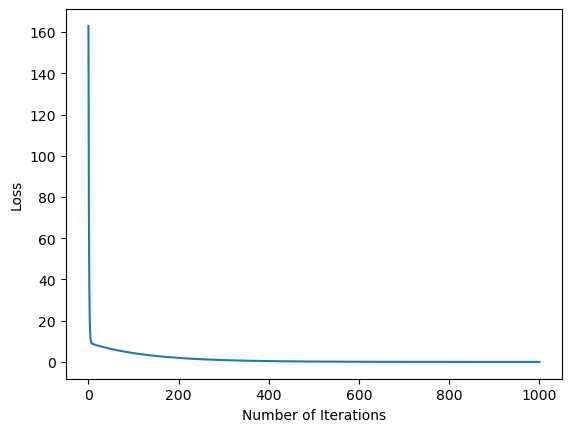

In [23]:
plt.plot(range(iteration_number),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")

Text(0.5, 1.0, 'Original vs Predicted values')

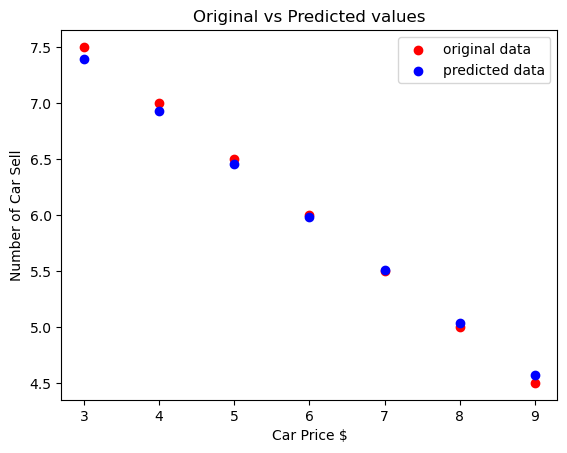

In [26]:
predicted = model(car_price_tensor).data.numpy()
plt.scatter(car_prices_array,number_of_car_sell_array,label = "original data",color ="red")
plt.scatter(car_prices_array,predicted,label = "predicted data",color ="blue")
plt.legend()
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Original vs Predicted values")

this is taken from the tutorial of linear regression model on pytorch